In [53]:
# import libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
x_data = np.linspace(0,1000,1000)
noise = np.random.uniform(-4, 4, size=len(x_data))

# X = np.linspace(0,10,10) + np.random.uniform(-2, 2, 10)
# Y = np.linspace(0,10,10) + np.random.uniform(-2, 2, 10)

y_true = x_data + noise + 5

In [86]:
batch_size= 50

In [98]:
# create a dataframe from data
df_x = pd.DataFrame(data = x_data, columns=['x_data'])
df_y = pd.DataFrame(data = y_true, columns=['y_true'])

train_data= pd.concat([df_x, df_y], axis=1)
train_data.head()

,x_data,y_true
0,0.000000,5.839011
1,1.001001,4.043911
2,2.002002,6.343823
3,3.003003,10.971693
4,4.004004,8.320449


In [93]:
random_indexes = np.random.randint(0,100,10)
df_x.iloc[[0,3,5],0]

0    0.000000
3    3.003003
5    5.005005
Name: x_data, dtype: float64

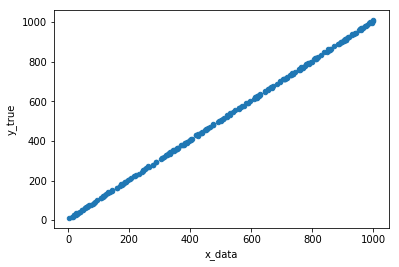

In [99]:
train_data.sample(n=250).plot(kind='scatter', x='x_data', y='y_true')

In [67]:
# define tensorflow graph

x = tf.placeholder(dtype=tf.float32, name='x', shape=[batch_size])
y = tf.placeholder(dtype=tf.float32, name='y', shape=[batch_size])

m = tf.Variable(initial_value = tf.random_normal(shape=(1,1),mean=0, stddev=1.0, dtype=tf.float32))
b = tf.zeros(shape=(1,1), dtype= tf.float32)

y_ = tf.add(tf.multiply(x, m), b)

cost  = tf.reduce_mean(tf.square((y-y_)))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)
cost_hist = []
prediction = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_epochs = 1000   
    
    # run training algorithm over num_epochs
    for epoch_no in range(num_epochs):
        
        # generate a random batch of train_x and train_y
        #random_indexes = np.random.randint(0,len(df_x), batch_size)
        
        # get batch_x, batch_y
        batch_x, batch_y = df_x.iloc[epoch_no : epoch_no + batch_size,0], df_y.iloc[epoch_no : epoch_no + batch_size,0]
        
        # compute cost
        computed_cost,_ = sess.run([cost, optimizer], feed_dict={x : batch_x, y : batch_y})
        
        cost_hist.append(computed_cost)
        if epoch_no% 100 == 0:
            print(" epoch: {}, cost: {}".format(epoch_no, computed_cost))
    opt_m, opt_b = sess.run([m,b])

    # use opt_m and opt_b for prediction
    prediction = ((x*opt_m) + opt_b)

 epoch: 0, cost: 0.24181222915649414
 epoch: 100, cost: 0.2746756672859192
 epoch: 200, cost: 0.27492469549179077
 epoch: 300, cost: 0.2012568712234497
 epoch: 400, cost: 0.23898792266845703
 epoch: 500, cost: 0.30651921033859253
 epoch: 600, cost: 0.2227165251970291
 epoch: 700, cost: 0.26080796122550964
 epoch: 800, cost: 0.27952033281326294
 epoch: 900, cost: 0.21186238527297974


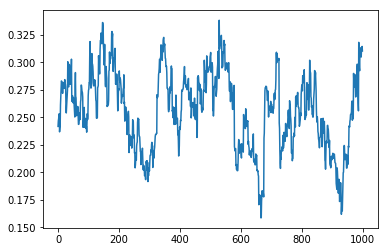

In [68]:
# plot variation of cost with no of epochs
plt.plot(range(num_epochs),cost_hist)
plt.show()